# Visualización de objetos asociados a tratamientos de radioterapia
------

## Estudio de CT

Los datos anatómicos para la *simulación* del tratamiento del paciente se adquieren mediante un estudio de tomografía computerizada *CT* con el paciente inmobilizaddo en una postura que sea reproducible a lo largo del tratamiento.

In [1]:
%cd ..

/Users/cesar/Documents/Development/GitHub/rtviewer


In [2]:
from skrt import Image

In [3]:
im = Image('patients/TestMamaDer001/20230116_095704/CT/20230116_095704')

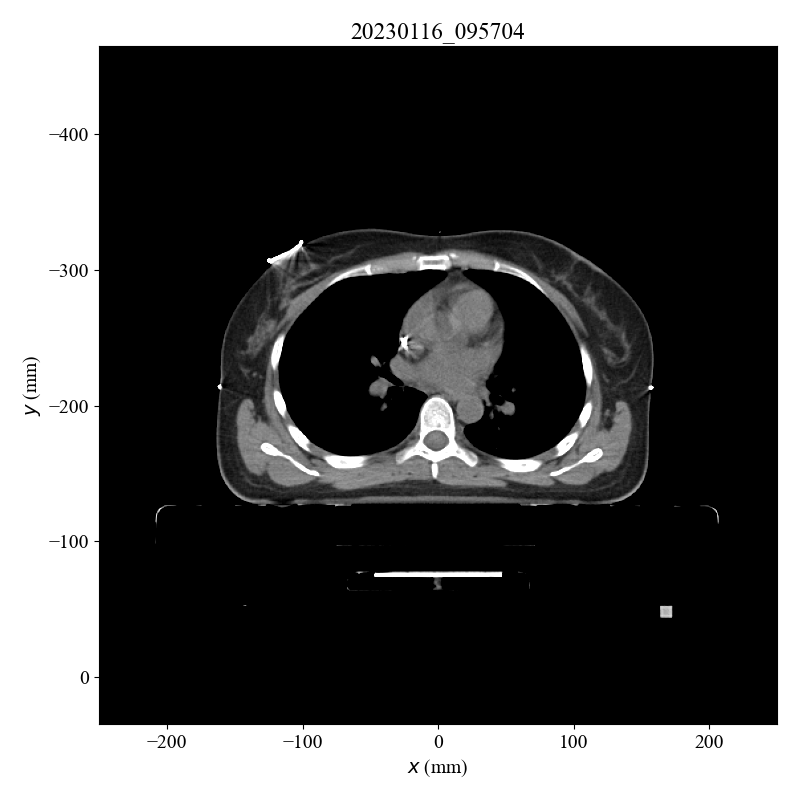

In [8]:
im.plot('x-y', idx = 30, figsize=8) 
# Cambiar el valor de idx para cambiar el plano visualizado
# Selcción de orientación de los planos  
## 'x-y' Axial
## 'x-z' Coronal
## 'y-z' Sagital  

## Estructuras

Los volumenes relevantes para la planificación, sean bien objetivos o bien regiones de interés, se tienen que delimitar sobre el estudio CT de simulación.

Las imágenes se tienen que segmentar mediante procesos manuales o semiautomáticos. Estos últimos utilizan procedimientos de base de conocimiento que se ha tenido que establecer mediante procesos manuales.

In [7]:
from skrt import StructureSet

In [8]:
ss = StructureSet('patients/TestMamaDer001/20230116_095704/RTSTRUCT/CT/20230116_095704/RS.1.2.246.352.205.5566667512400723974.375329800850442140.dcm')

Los conjuntos de estructuras se visualizan asociándolos a la imagen a partir de la quee han sido generados

In [9]:
im.add_structure_set(ss)

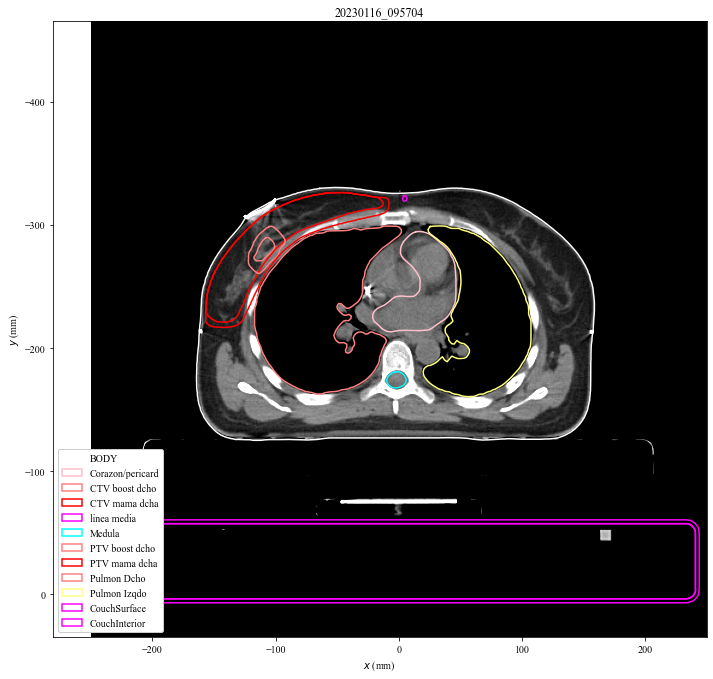

In [10]:
im.plot(idx=30, figsize=10, rois='all', legend=True)

In [11]:
from skrt import Patient

In [12]:
pat = Patient('patients/TestMamaDer001')

In [78]:
pat.studies[0]


Study
{
  ct_doses: [5 * <class 'skrt.dose.Dose'>] 
  ct_images: [1 * <class 'skrt.image.Image'>] 
  ct_plans: [4 * <class 'skrt.dose.Plan'>] 
  ct_structure_sets: [2 * <class 'skrt.structures.StructureSet'>] 
  date: '20230116' 
  dose_types: {1 * keys of type <class 'str'>} 
  files: [4 * <class 'skrt.core.File'>] 
  image_types: {1 * keys of type <class 'str'>} 
  path: '/Users/cesar/Documents/Development/GitHub/rtviewer/patients/TestMamaDer001/20230116_095704' 
  patient: <class 'skrt.patient.Patient'> 
  plan_types: {1 * keys of type <class 'str'>} 
  print_depth: 0 
  structure_set_types: {1 * keys of type <class 'str'>} 
  subdir: '' 
  time: '095704' 
  timestamp: '20230116_095704' 
}

In [13]:
stdy = pat.studies[0]

In [76]:
stdy.ct_structure_sets[0]


StructureSet
{
  alpha_beta_ratios: {} 
  colors: None 
  date: '20230116' 
  dicom_dataset: None 
  files: [] 
  ignore_dicom_colors: False 
  image: <class 'skrt.image.Image'> 
  keep_renamed_only: False 
  loaded: False 
  multi_label: False 
  name: 'rs.1.2.246.352.205.5566667512400723974.375329800850442140.dcm' 
  names: None 
  path: '/home/radiofisica/Shares/Radiofisica/csr/rtviewer/patients/TestMamaDer001/20230116_095704/RTSTRUCT/CT/20230116_095704/RS.1.2.246.352.205.5566667512400723974.375329800850442140.dcm' 
  patient: <class 'skrt.patient.Patient'> 
  plans: [] 
  print_depth: 0 
  roi_kwargs: {} 
  rois: [] 
  sources: [1 * <class 'str'>] 
  subdir: '' 
  summed_names: [] 
  time: '095704' 
  timestamp: '20230116_095704' 
  to_keep: None 
  to_remove: None 
}

In [14]:
ss0 = stdy.ct_structure_sets[0]

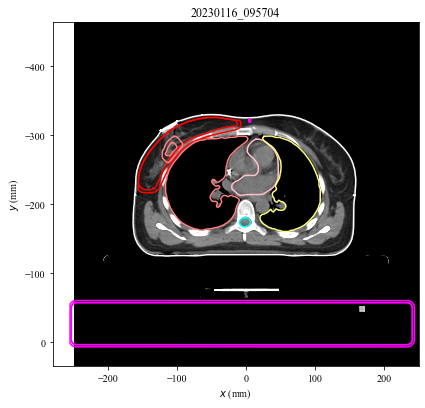

In [15]:
ss0.plot()

In [18]:
from matplotlib import pyplot as plt

In [91]:
!ls /Users/cesar/Documents/Development/GitHub/rtviewer/patients/TestMamaDer001/20230116_095704/RTDOSE/CT/20230116_095704/

RD.1.2.246.352.221.47352446189117142439988284232660965553.dcm
RD.1.2.246.352.221.488893207455186615011534392364350689689.dcm
RD.1.2.246.352.221.52708297311437444114737711031232263301.dcm
RD.1.2.246.352.221.56180825880144060698193516247443136422.dcm
dose_resample.nii


In [139]:
stdy.ct_doses[3]


Dose
{
  affine: None 
  data: None 
  date: '20230116' 
  default_intensity: None 
  dicom_dataset: None 
  dose_summation_type: None 
  dose_type: None 
  dose_units: None 
  downsampling: None 
  files: [] 
  image: <class 'skrt.image.Image'> 
  log_level: 'WARNING' 
  logger: <Logger Dose (WARNING)> 
  nifti_array: False 
  origin: [3 * <class 'int'>] 
  path: '/Users/cesar/Documents/Development/GitHub/rtviewer/patients/TestMamaDer001/20230116_095704/RTDOSE/CT/20230116_095704/RD.1.2.246.352.221.47352446189117142439988284232660965553.dcm' 
  patient: <class 'skrt.patient.Patient'> 
  plan: <class 'skrt.dose.Plan'> 
  print_depth: 0 
  sinogram: None 
  source: '/Users/cesar/Documents/Development/GitHub/rtviewer/patients/TestMamaDer001/20230116_095704/RTDOSE/CT/20230116_095704/RD.1.2.246.352.221.47352446189117142439988284232660965553.dcm' 
  source_type: None 
  structure_sets: [] 
  subdir: '' 
  time: '095704' 
  timestamp: '20230116_095704' 
  title: None 
  voxel_size: [3 * <cla

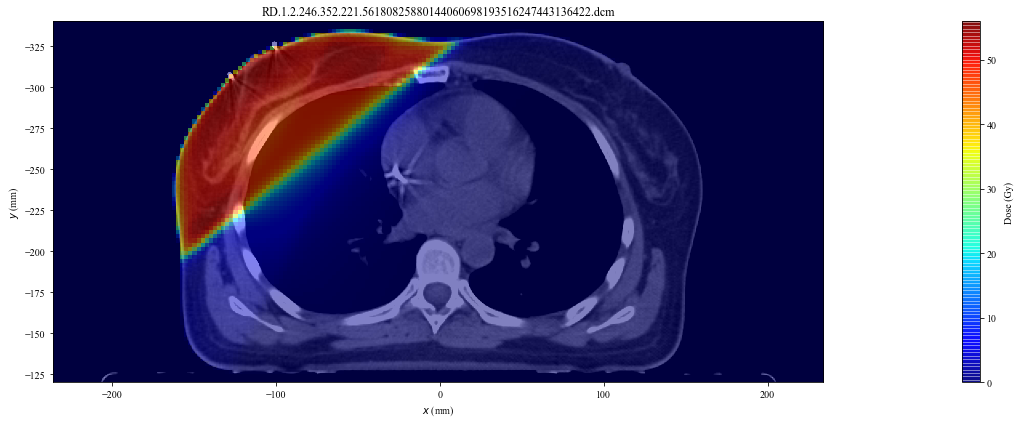

In [16]:
stdy.ct_doses[0].plot(include_image=True, pos=100, colorbar=1)

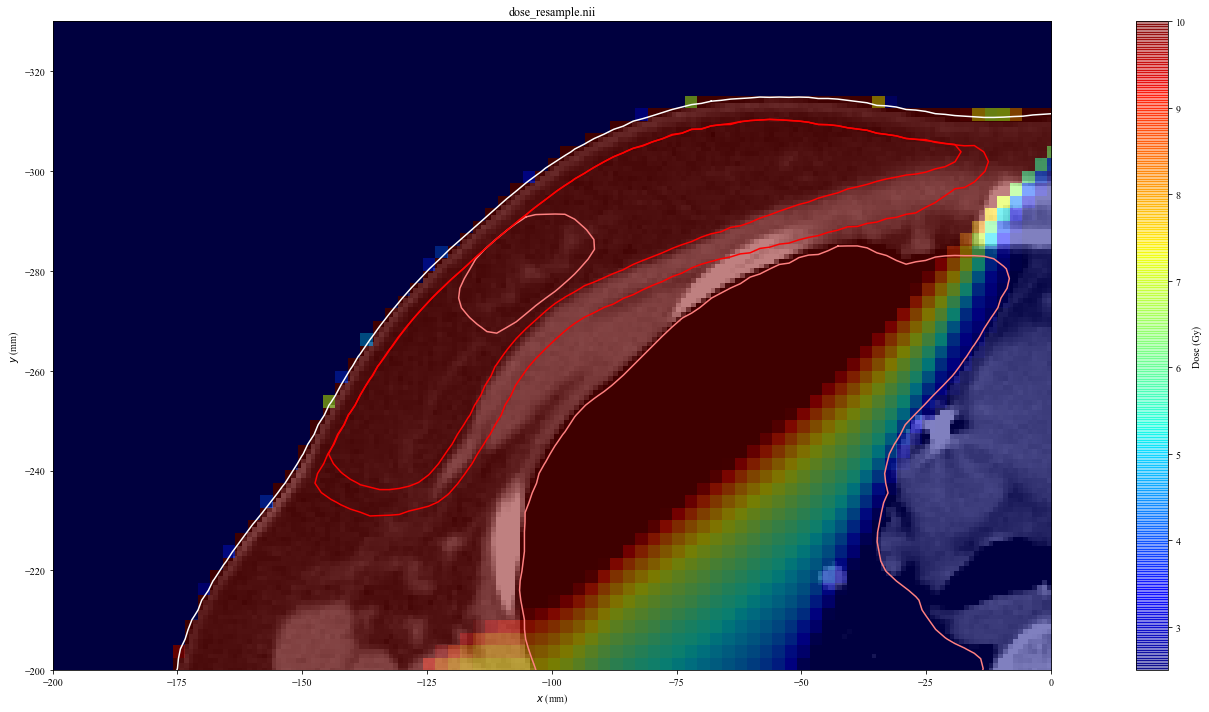

In [19]:
pos=150
fig, ax = plt.subplots(figsize=(20,10))
ss0.plot(ax=ax, show=False, pos=pos)
stdy.ct_doses[2].plot(pos=pos, colorbar=1, ax=ax, intensity=[2.5,10], zoom=1, xlim=[-200,0], ylim=[-200, -330])
plt.show()

In [98]:
im0 = stdy.ct_images[0]

In [100]:
ds2 = stdy.ct_doses[2]

In [116]:
ds2.get_voxel_size()

[-2.5, -2.5, 2.5]

In [134]:
im0.get_origin(), im0.get_voxel_size()

([-249.5, -464.5, -37.0], [1, 1, 1])

In [130]:
imrs = im0.transform(resample='fine')

In [133]:
im0.resample(order=2)

In [20]:
dose3 = stdy.ct_doses[3]

In [21]:
dose3.resample(order=2)

In [144]:
dose3.get_voxel_size()

[1, 1, 1]

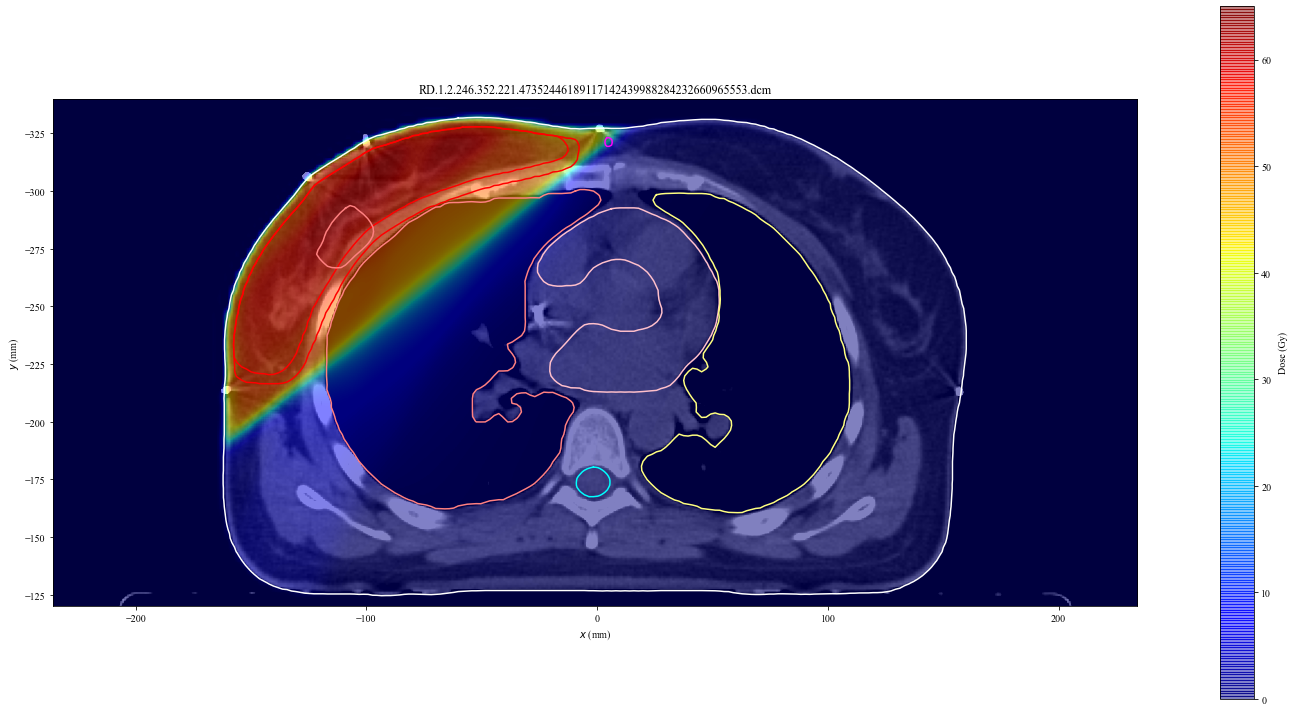

In [23]:
pos=111
fig, ax = plt.subplots(figsize=(20,10))
ss0.plot(ax=ax, show=False, pos=pos)
dose3.plot(pos=pos, colorbar=1, ax=ax, zoom=1, intensity=[0, 65])
plt.show()

In [24]:
from dicompylercore import dicomparser, dvh, dvhcalc

In [25]:
dp = dicomparser.DicomParser('patients/TestMamaDer001/20230116_095704/RTSTRUCT/CT/20230116_095704/RS.1.2.246.352.205.5566667512400723974.375329800850442140.dcm')

In [26]:
strs = dp.GetStructures()

In [27]:
strs.keys()

dict_keys([1, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20])

In [268]:
strs[14]

{'id': 14,
 'name': 'PTV boost dcho',
 'type': 'PTV',
 'color': array([255, 128, 128]),
 'empty': False}

In [28]:
rtdose = dicomparser.DicomParser('patients/TestMamaDer001/20230116_095704/RTDOSE/CT/20230116_095704/RD.1.2.246.352.221.47352446189117142439988284232660965553.dcm')

In [29]:
calcdvh14 = dvhcalc.get_dvh(
    'patients/TestMamaDer001/20230116_095704/RTSTRUCT/CT/20230116_095704/RS.1.2.246.352.205.5566667512400723974.375329800850442140.dcm', 
    'patients/TestMamaDer001/20230116_095704/RTDOSE/CT/20230116_095704/RD.1.2.246.352.221.47352446189117142439988284232660965553.dcm', 
    14)
calcdvh15 = dvhcalc.get_dvh(
    'patients/TestMamaDer001/20230116_095704/RTSTRUCT/CT/20230116_095704/RS.1.2.246.352.205.5566667512400723974.375329800850442140.dcm', 
    'patients/TestMamaDer001/20230116_095704/RTDOSE/CT/20230116_095704/RD.1.2.246.352.221.47352446189117142439988284232660965553.dcm', 
    15)

DVH(cumulative, 6460 bins: [0.0:64.6] Gy, volume: 100.0 %, name: 'PTV mama dcha', rx_dose: 0 Gy)

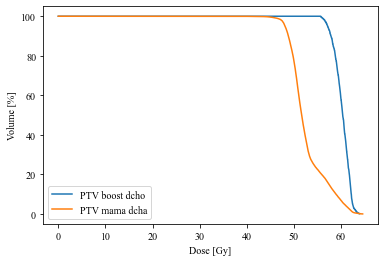

In [30]:
calcdvh14.relative_volume.plot()
calcdvh15.relative_volume.plot()

In [31]:
cdvhl = [dvhcalc.get_dvh(
    'patients/TestMamaDer001/20230116_095704/RTSTRUCT/CT/20230116_095704/RS.1.2.246.352.205.5566667512400723974.375329800850442140.dcm', 
    'patients/TestMamaDer001/20230116_095704/RTDOSE/CT/20230116_095704/RD.1.2.246.352.221.47352446189117142439988284232660965553.dcm', 
    key) for key in strs.keys()]

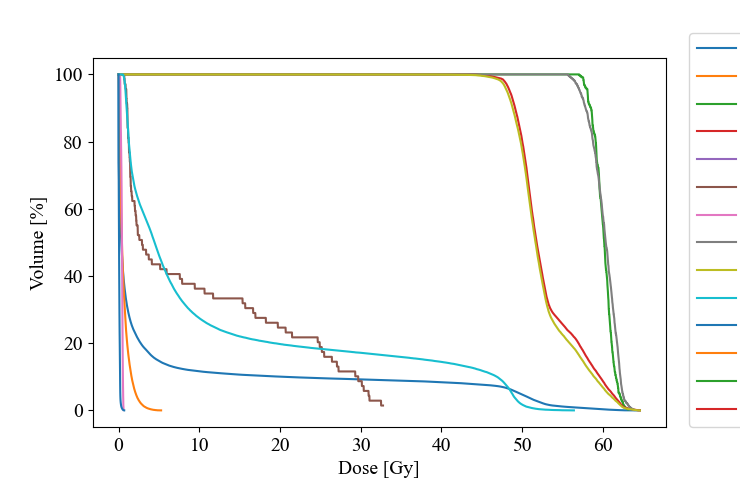

In [35]:
for cdvh in cdvhl:
    cdvh.relative_volume.plot()
plt.legend(loc=(1.04, 0))
plt.show()

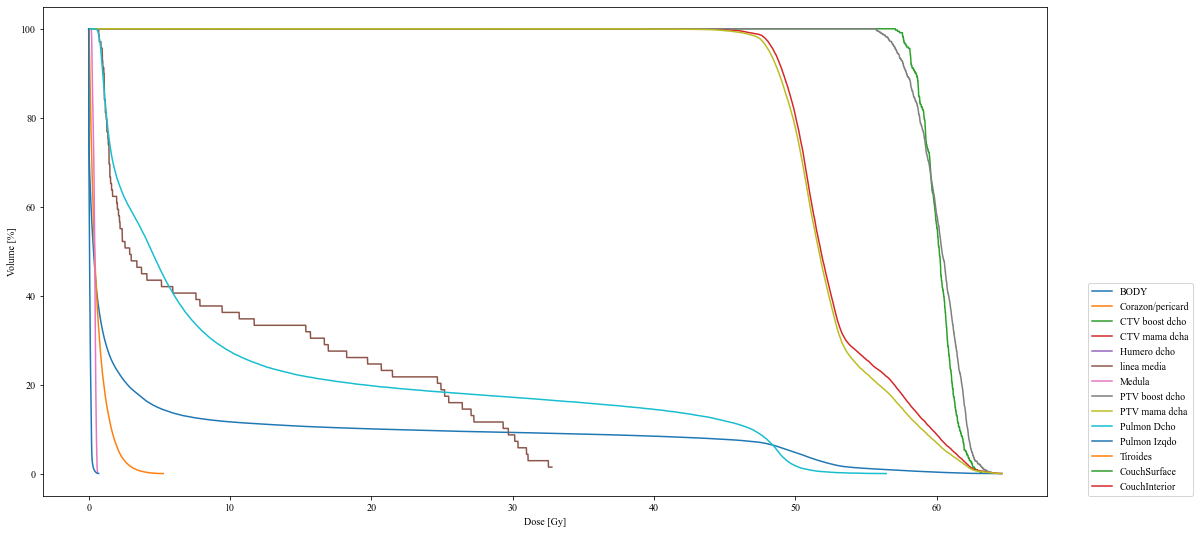

In [33]:
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(9)
for cdvh in cdvhl:
    cdvh.relative_volume.plot()
plt.legend(loc=(1.04, 0))
plt.show()

In [4]:
import ipywidgets as wdg

In [5]:
%matplotlib widget